# $Clase \ 13-Octubre-2020$

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

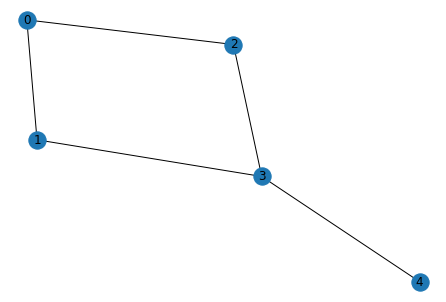

In [17]:
#Se genera una matriz.
A = np.array([[0,1,1,0,0],[1,0,0,1,0],[1,0,0,1,0],[0,1,1,0,1],[0,0,0,1,0]])
G= nx.from_numpy_matrix(A)
nx.draw(G,with_labels=True)

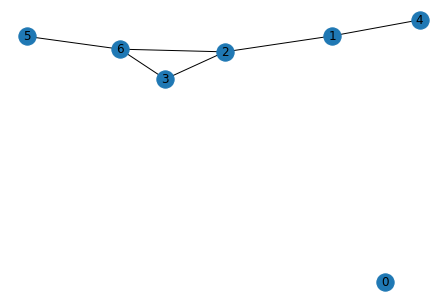

In [18]:
#Generamos una red.
G1 = nx.Graph()
G1.add_nodes_from([0,1,2,3,4,5,6])
G1.add_edges_from([[1,2],[5,6],[4,1],[3,6],[2,6],[2,3]])
nx.draw(G1, with_labels=True)

In [19]:
A1 = nx.to_numpy_matrix(G1)
A1

matrix([[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0.],
        [0., 1., 0., 1., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 1., 0., 1., 0.]])

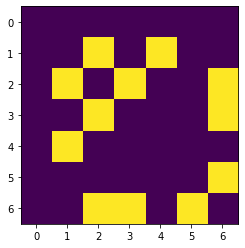

In [22]:
plt.imshow(A1)

# DiGraph()

#### Se usa para redes dirigidas.

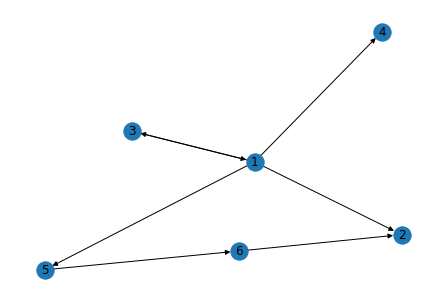

In [25]:
DG = nx.DiGraph()
DG.add_nodes_from([1,2,3,4,5,6])
DG.add_edges_from([[1,2],[1,3],[1,4],[1,5],[5,6],[6,2],[3,1]])
nx.draw(DG, with_labels=True)

#### Generamos la matriz de adyacencia para la red dirigida.

#### La convención en que se tiene el origen y destino, es al revés de como la conocemos (o como se ha estudiado).
#### Filas origen, y columnas el destino.

In [26]:
nx.to_numpy_array(DG)

array([[0., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.]])

# G= nx.from_numpy_array(A , create_using=nx.DiGraph)

#### Sirve para poder formar una red dirigida desde un array de numpy.
#### En este caso, A hace el papel del array.

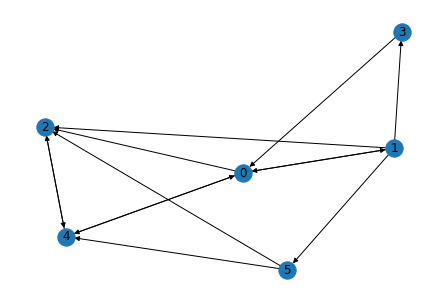

In [2]:
A= np.array([[0,1,1,0,1,0],[1,0,1,1,0,1],[0,0,0,0,1,0],[1,0,0,0,0,0],[1,0,1,0,1,0],[0,0,1,0,1,0]])
G= nx.from_numpy_array(A,create_using=nx.DiGraph)
nx.draw(G,with_labels=True)

# Trabajo con redes reales y medidas de centralidad.

## Se usará la librería pandas.

In [20]:
#datos = pd.read_csv(ruta2, skiprows = 2, header = None, sep = " ")

In [21]:
#G = nx.from_pandas_edgelist(datos, source= 0, target = 1)

In [3]:
#plt.figure(figsize = [8,8])
#nx.draw(G)

#### pd.read_csv( ):  Se usa para poder leer el archivo que queremos.

#### Debemos poner, como primer argumento, el nombre del archivo que queremos visualizar.

#### *nrows = 0,1, ... *: Sirve para ver una cantidad de renglones de los datos, es muy útil para poder ver como están estructurados los datos. 

#### *skiprows*:  Sirve para omitir renglones, es decir, para eliminarlos. Se usa para quitar los renglones que nos estorban.

#### *header = None*: Con este comando se quita el encabezado que archivo pudiera tener.

#### *sep = " " , - , etc*: Indicamos como están separados nuestros elementos, pueden estar separados con comas, guiones, etc.

#### IMPORTANTE: Ya que se han utilizado estos comandos, se puede quitar *nrows* , para así ver todos los elementos del archivo.

In [1]:
#Esta es la libreria pandas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

#Este es el nombre del archivo.
archivo = "bio-celegans-dir.edges"

datos = pd.read_csv(archivo, #nrows = 10, 
            skiprows = None, header = None, sep = " ")

# nx.from_pandas_edgelist(datos, source = , target =  ) 

#### Sirve para poder hacer las aristas en nuestros datos de pandas.
#### Se debe poner el nombre de la variable que dimos para guardar los datos de pandas.
#### *source =* :  el número de la columna de origen.
#### *target =* : el número de la columna destino. 

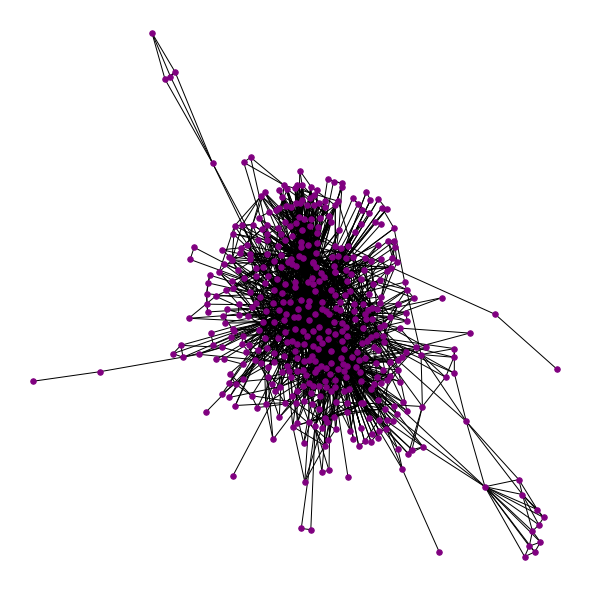

In [2]:
G = nx.from_pandas_edgelist(datos, source = 0, target = 1 )

plt.figure(figsize = [8,8])
nx.draw(G,
       node_size=30,
       node_color = "purple",
       #node_shape = " "
       )

# Centralidad de nodos.

# nx.degree_centrality(G)

#### Sirve para calcular la centralidad de grado.

#### Python nos lo da como un diccionario.

# Lista de comprensión. 
## La estructura es la siguiente: [  i for i in range "conjunto" ]

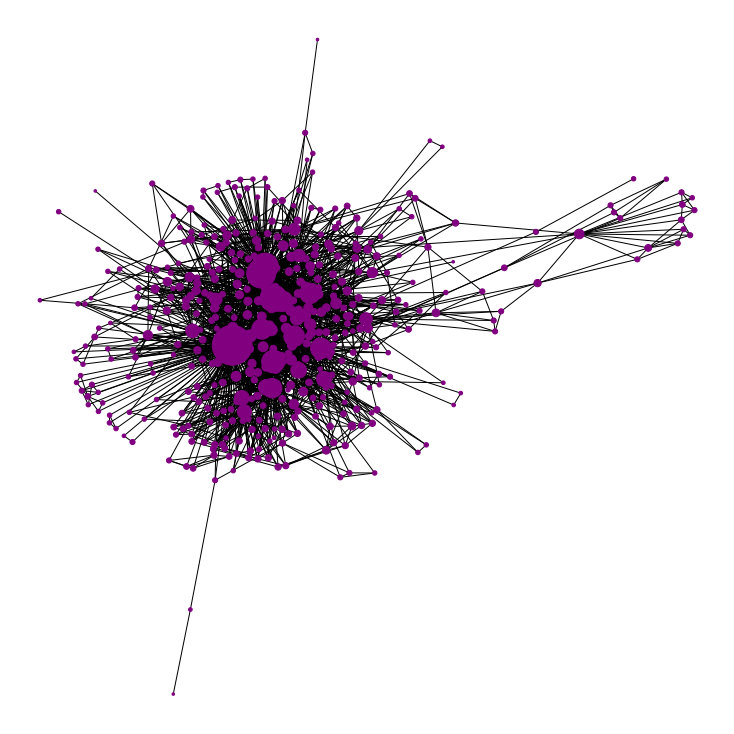

In [3]:
degree = nx.degree_centrality(G)

#Valor de las centralidades de nodo.
sizes = np.array( [degree[i] for i in G] )

#Este comando nos da el tamaño de la imagen.
plt.figure(figsize = [10,10])
#En esta línea se hace la visualización de la red.
nx.draw(G,
       node_size=3000*sizes ,
       node_color = "purple",
       #node_shape = " "
       )

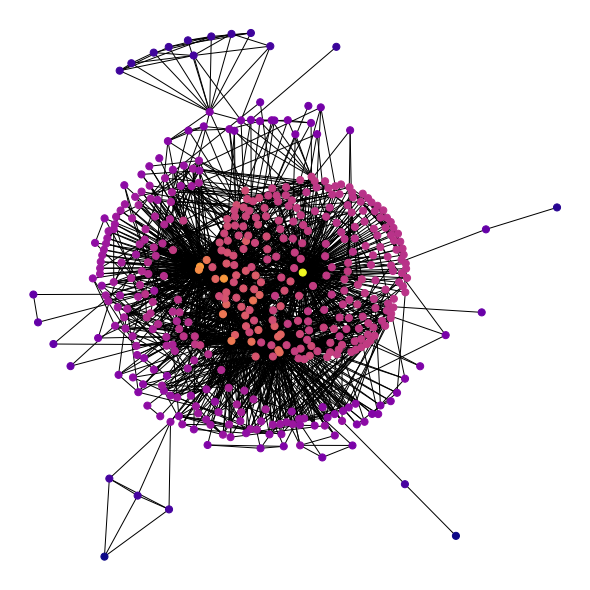

In [4]:
closeness = nx.closeness_centrality(G)
colors = np.array( [closeness[i] for i in G] )

plt.figure(figsize = [8,8])
nx.draw_kamada_kawai(G,
       node_size = 50,
       node_color= colors,
       cmap = "plasma")

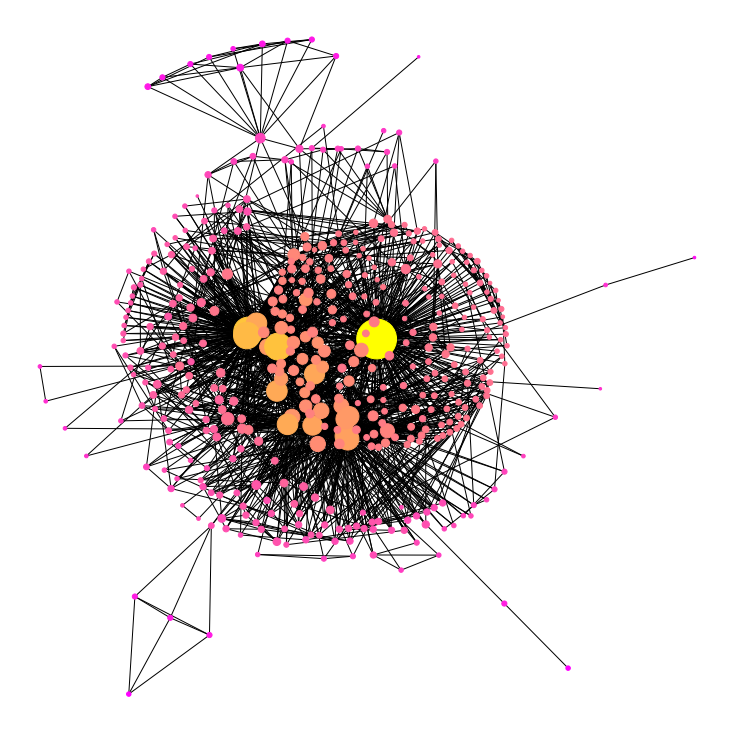

In [5]:
plt.figure(figsize = [10,10])
nx.draw_kamada_kawai(G,
       node_size = 3000*sizes,
       node_color= colors,
       cmap = "spring"
                    )

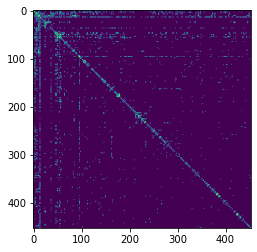

In [6]:
A = nx.to_numpy_array(G)
plt.imshow(A)

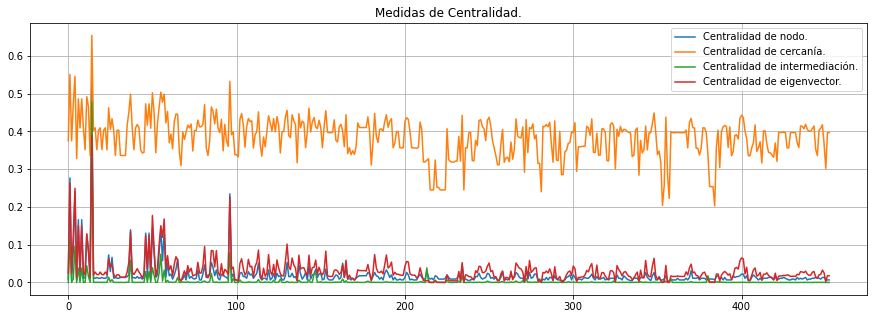

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

degree = nx.degree_centrality(G)
d = np.array( [degree[i] for i in G] )

closeness = nx.closeness_centrality(G)
c = np.array( [closeness[i] for i in G] )

between = nx.betweenness_centrality(G)
b = np.array( [between[i] for i in G] ) 

eigenvector = nx.eigenvector_centrality(G)
e = np.array( [eigenvector[i] for i in G] )

plt.figure(figsize=[15,5])
plt.grid()
plt.title("Medidas de Centralidad.")
plt.plot(d, label= "Centralidad de nodo.")
plt.plot(c, label= "Centralidad de cercanía.")
plt.plot(b, label= "Centralidad de intermediación.")
plt.plot(e, label= "Centralidad de eigenvector.")
plt.legend()
plt.show()